<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/NLP_INTRODUCTION/blob/main/IMDB_REVIEW_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About Dataset

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing.

So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import tensorflow as tf

In [2]:
## data csv
path = "/content/drive/MyDrive/IMDB Dataset.csv"
data = pd.read_csv(path)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
## taking data sample size with 100 reviews:
df = data[:300].copy()
print(f"df shape: {df.shape}")
print(f"sample df \n")
df.sample(2)

df shape: (300, 2)
sample df 



,review,sentiment
168,"The premise of this movie was decent enough, b...",negative
52,Bela Lugosi appeared in several of these low b...,positive


- working data frame is 'df'


In [4]:
df.review[10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

In [5]:
## removing the tag and possible https links:
link_html_tag_pattern = [r'<.*?>', r'https://\S+',r'\d+']
short_hand_pattern = r'\b[A-Z]{2,}\b'
multiple_dot_pattern = r'\.{2,}'

# set first counter 0
counter = 0
short_hand_list = []


for i in df.review:                                     # loop into df reviews
    try:
        for tag in link_html_tag_pattern:               ## loop into pattern:
            i = re.sub(tag, '', i)                      ## subtituting pattern in review

        i = re.sub(multiple_dot_pattern, '.', i)
        short_forms = re.findall(short_hand_pattern, i) ## checking any short hand like "ASAP"

        if short_forms is not None:
           short_hand_list.append(short_forms)         ## append to list
        df.loc[counter, 'review'] = i                  ## update review

    except Exception as e:
        print(f"Error processing review {counter}: {e}")

    counter = counter + 1


In [6]:
df.review[0]

"One of the other reviewers has mentioned that after watching just  Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many.Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more.so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wouldn'

In [7]:
## checking the possibe word like ASAP
for i in short_hand_list:
    if i == []:
        pass
    else:
        print(f"all short abbreviations: {set(i)}")

all short abbreviations: {'OZ', 'GO'}
all short abbreviations: {'BBC'}
all short abbreviations: {'OK', 'BOOGEYMAN'}
all short abbreviations: {'TV'}
all short abbreviations: {'FAR', 'SPOILER', 'GMS', 'BTW', 'CRY'}
all short abbreviations: {'WAS', 'LOTR'}
all short abbreviations: {'DVD'}
all short abbreviations: {'SO'}
all short abbreviations: {'FX', 'VERY', 'RACER', 'AM', 'MSTK', 'WWWAAAAAYYYYY', 'DVD', 'BOOM', 'DO', 'VHS', 'SPEED'}
all short abbreviations: {'USA'}
all short abbreviations: {'THREE', 'KINGS', 'WAR', 'INC'}
all short abbreviations: {'DC'}
all short abbreviations: {'KNOWS'}
all short abbreviations: {'PG'}
all short abbreviations: {'UK', 'IS'}
all short abbreviations: {'MA', 'ANYONE', 'LOGIC', 'FBI'}
all short abbreviations: {'SOMEONE'}
all short abbreviations: {'WOULD', 'TV', 'VHS', 'DVD'}
all short abbreviations: {'CV'}
all short abbreviations: {'BOOK', 'KANE', 'CITIZEN', 'GLORY', 'THE', 'AND', 'POWER'}
all short abbreviations: {'SPOILER', 'WWI', 'ALERT', 'SPOILERS', 'US'

In [8]:
## replace the Abbriviation
abbreviation_dict = {
    'BBC': 'British Broadcasting Corporation',
    'TV': 'Television',
    'DVD': 'Digital Versatile Disc',
    'VHS': 'Video Home System',
    'US': 'United States',
    'BTW': 'between',
    'UK':'United Kingdom'
}

counter = 0
for i in data.review:
    try:
        # Replace full forms with abbreviations
        for key, value in abbreviation_dict.items():
            if key in i:
                data.review[counter] = i.replace(key, value)
            else:
                pass

    except Exception as e:
        print(f"Error processing review {counter}: {e}")
    counter = counter+1

In [81]:
### lower the letter cases:
counter = 0

for i in df.review:
    try:
        lower_case = str(i).lower()
        df.loc[counter,'review'] = lower_case

    except Exception as e:
        print(f"Error processing review {counter}: {e}")
    counter = counter+1


In [82]:
## checking df:
df.review[10]

"['phil', 'alien', 'one', 'quick', 'film', 'humour', 'base', 'around', 'address', 'everyth', 'rather', 'actual', 'punchlinesat', 'first', 'veri', 'odd', 'pretti', 'funni', 'movi', 'progress', 'didnt', 'find', 'joke', 'address', 'funni', 'anymoreit', 'low', 'budget', 'film', 'never', 'problem', 'pretti', 'interest', 'charact', 'eventu', 'lost', 'interesti', 'imagin', 'film', 'would', 'appeal', 'stoner', 'current', 'partingfor', 'someth', 'similar', 'better', 'tri', 'brother', 'anoth', 'planet']"

In [ ]:
from textblob import TextBlob
counter = 0

for i in df.review:
    try:
        correction = TextBlob(i).correct()
        df.loc[counter,'review'] = str(correction)

    except Exception as e:
        print(f"Error processing review {counter}: {e}")
    counter = counter+1


In [ ]:
## removing all punctuations except dot
counter = 0

for i in range(len(df.review)):
    try:
        for punctuations in string.punctuation:
            if punctuations in df.review[i]:
                df.review[i] = df.review[i].replace(punctuations,'')
            else:
                pass
    except Exception as e:
        print(f"error in punctuation subs {e}")


In [13]:
## from nltk import stopwords
from nltk.corpus import stopwords

## from nltk importing SnowballStemmer
from nltk.stem import SnowballStemmer

## downloading pre define list, we can make customized one
nltk.download('punkt')
nltk.download('stopwords')

# Get the list of unique English stopwords
stop_words_eng = set(stopwords.words('english'))

# initializing SnowballStemmer(english) as stemmer_snow_eng
stemmer_snow_eng =  SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:

# Tokenizing the sentence
counter = 0

# calling review items
for i in df.review:
    try:
        ## tokenizing words
        tokenize_word = nltk.word_tokenize(i) ## use sentence tokenizer also
        ## set list as null
        stop_words_sentence = []

        ## loop through each tokenized word
        for j in tokenize_word:
            # steem the word ex."running as run"
            stemmed_word = stemmer_snow_eng.stem(j)

            ## removing stop word (like is,the...,etc)
            if stemmed_word not in stop_words_eng:
                stop_words_sentence.append(stemmed_word)
            else:
                pass
        df.review[counter] = stop_words_sentence.copy()

    except Exception as e:
        print(f"Error processing review {counter}: {e}")
    counter = counter+1

In [15]:
## checking df:
df.review[0]

['one',
 'review',
 'mention',
 'watch',
 'oz',
 'episod',
 'youll',
 'hook',
 'right',
 'exact',
 'happen',
 'meth',
 'first',
 'thing',
 'struck',
 'oz',
 'brutal',
 'unflinch',
 'scene',
 'violenc',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'heart',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violenc',
 'hardwar',
 'classic',
 'use',
 'wordit',
 'call',
 'oz',
 'nicknam',
 'given',
 'onward',
 'maximum',
 'secur',
 'state',
 'penitentiari',
 'focus',
 'main',
 'emerald',
 'citi',
 'experiment',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inward',
 'privaci',
 'high',
 'agenda',
 'em',
 'citi',
 'home',
 'manyorgan',
 'muslin',
 'gangsta',
 'nation',
 'christian',
 'italian',
 'irish',
 'moreso',
 'snuffl',
 'death',
 'stare',
 'podgi',
 'deal',
 'shadi',
 'agreement',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goe',
 'show',
 'wouldnt',
 'dare',
 'forget',
 'pretti',
 

---
---

- This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

- By default, all punctuation is removed, turning the texts into space-separated sequences of words (words may include the ' character).

- These sequences are then split into lists of tokens. They will then be indexed or vectorized.

In [16]:
## train_test spliting the df frame
x = df.review
y = df.sentiment

In [17]:
print(f"x[0]:",len(x[0]))
print(f"x[1]:",len(x[1]))

x[0]: 167
x[1]: 88


In [18]:
### integer encoding using keras:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token = '<NOTHING>')
tokenizer.fit_on_texts(x)

In [19]:
tokenizer.texts_to_sequences(x[3])

[[400],
 [181],
 [54],
 [275],
 [1536],
 [26],
 [596],
 [1537],
 [597],
 [287],
 [2401],
 [3],
 [2402],
 [1292],
 [1538],
 [786],
 [1536],
 [259],
 [139],
 [2403],
 [95],
 [3387],
 [33],
 [22],
 [10],
 [2],
 [133],
 [259],
 [470],
 [512],
 [512],
 [3],
 [1109],
 [597],
 [3388],
 [3389],
 [5],
 [113],
 [51],
 [1536],
 [1537],
 [207],
 [867],
 [2],
 [246],
 [7],
 [3390],
 [288],
 [3],
 [289],
 [8],
 [512],
 [1878],
 [470],
 [868],
 [25],
 [31],
 [597],
 [2404],
 [397],
 [200],
 [1536],
 [973]]

In [20]:
## performing the split:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)


print(f"x_train shape {x_train.shape}\n x_train_length: {len(x_train)}")
print(f"y_train shape {y_train.shape}\n y_train_length: {len(y_train)}")

x_train shape (270,)
 x_train_length: 270
y_train shape (270,)
 y_train_length: 270


In [21]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [22]:
## paddding the each rows :
from keras.utils import pad_sequences

x_train = pad_sequences(x_train, maxlen=1000, padding='post')
x_test = pad_sequences(x_test, maxlen=1000, padding='post')

print(f"x_train shape {x_train.shape}\n x_train_length: {len(x_train)}")
print(f"y_train shape {y_train.shape}\n y_train_length: {len(y_train)}")

x_train shape (270, 1000)
 x_train_length: 270
y_train shape (270,)
 y_train_length: 270


In [23]:
## checking y_train
# Create a mapping dictionary
label_mapping = {"positive": 0, "negative": 1}

# Map labels in y_train and y_test
y_train = [label_mapping[label] for label in y_train]
y_test = [label_mapping[label] for label in y_test]


print(f"y_train[0]: {(y_train[0])}")
print(f"y_train[1]: {(y_train[1])}")

y_train[0]: 0
y_train[1]: 1


---
1. input_dim:
- This refers to the size of the vocabulary in your dataset.
- In natural language processing, it represents the total number of unique words that are present in your text corpus.

- For example, if we're working with a dataset of movie reviews and we've preprocessed it to have a vocabulary of 10,000 unique words, input_dim would be set to 10,000.


2. output_dim:
- This is the dimension of the dense embedding.
- It determines the size of the vectors that the words will be mapped to.
- Essentially, it's the number of hidden units in the embedding layer.

In our case, we're using an output_dim of 2, which means each word in your dataset will be represented as a vector with 2 values.

3. input_length:
- This is the length of input sequences, i.e., the number of words in each input sequence.
- If you're using fixed-length sequences (e.g., for training a recurrent neural network, you might have a fixed sequence length of 1500 words), then you would set input_length to that value.
- This parameter is crucial because it determines how many words from each sequence will be processed by the embedding layer.

---

In [24]:
# findind input dim:
vocab_size = len(tokenizer.word_index)
print(f"Vocabulary size: {vocab_size} + {1}")


Vocabulary size: 6639 + 1


using SimpleRNN

In [25]:
## creating sequential model layers:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 6771, output_dim=2, input_length=1000),
    tf.keras.layers.SimpleRNN(100, activation='relu', return_sequences = True),  # Added return_sequences=True
    tf.keras.layers.SimpleRNN(50, activation='relu',return_sequences = False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


## model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 2)           13542     
                                                                 
 simple_rnn (SimpleRNN)      (None, 1000, 100)         10300     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                7550      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31443 (122.82 KB)
Trainable params: 31443 (122.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Create a function to implement a Earlystop callback with loss monitor)
Early_stop = tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience = 2, verbose = 2)

## model compiling :
optimize = tf.keras.optimizers.experimental.Adam(learning_rate=0.01)
model.compile(optimizer = optimize, loss ='binary_crossentropy', metrics =['accuracy'])

In [27]:
# fitting the model:
history = model.fit(x_train,y_train,
                  validation_data=(x_test, y_test),
                  batch_size=32,
                  epochs=5,
                  callbacks=Early_stop)

ValueError: ignored

In [28]:
## converting into numpy:

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [29]:
# fitting the model:
history = model.fit(x_train,y_train,
                  validation_data=(x_test, y_test),
                  batch_size=32,
                  epochs=5,
                  callbacks=Early_stop)

Epoch 1/5
9/9 [==============================] - 25s 2s/step - loss: 0.6976 - accuracy: 0.4667 - val_loss: 0.6926 - val_accuracy: 0.7000
Epoch 2/5
9/9 [==============================] - 21s 2s/step - loss: 0.6942 - accuracy: 0.4667 - val_loss: 0.6930 - val_accuracy: 0.7000
Epoch 3/5
9/9 [==============================] - 20s 2s/step - loss: 0.6940 - accuracy: 0.5185 - val_loss: 0.6830 - val_accuracy: 0.7000
Epoch 4/5
9/9 [==============================] - 20s 2s/step - loss: 0.6931 - accuracy: 0.5185 - val_loss: 0.6786 - val_accuracy: 0.7000
Epoch 5/5
9/9 [==============================] - 21s 2s/step - loss: 0.6925 - accuracy: 0.5185 - val_loss: 0.6816 - val_accuracy: 0.7000


# usinng LSTM

In [75]:
## creating sequential model layers:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 6771, output_dim=2, input_length=1000),
    tf.keras.layers.LSTM(100, activation='relu', return_sequences = True),  # Added return_sequences=True
    tf.keras.layers.LSTM(50, activation='relu',return_sequences = False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## model summary:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 2)           13542     
                                                                 
 lstm_5 (LSTM)               (None, 1000, 100)         41200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                30200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 84993 (332.00 KB)
Trainable params: 84993 (332.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
# Create a function to implement a Earlystop callback with loss monitor)
Early_stop = tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience = 3, verbose = 2)

## model compiling :
optimize = tf.keras.optimizers.experimental.Adam(learning_rate=0.001)
model_1.compile(optimizer = optimize, loss ='binary_crossentropy', metrics =['accuracy'])

In [80]:
# fitting the model:
model_1.fit(x_train,y_train,
                  validation_data=(x_test, y_test),
                  batch_size=32,
                  epochs=5,
                  callbacks=Early_stop)

Epoch 1/5
9/9 [==============================] - 42s 4s/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 0.6919 - val_accuracy: 0.7000
Epoch 2/5
9/9 [==============================] - 35s 4s/step - loss: 0.6932 - accuracy: 0.5185 - val_loss: 0.6901 - val_accuracy: 0.7000
Epoch 3/5
9/9 [==============================] - 40s 4s/step - loss: 0.6930 - accuracy: 0.5185 - val_loss: 0.6894 - val_accuracy: 0.7000
Epoch 4/5
9/9 [==============================] - 37s 4s/step - loss: 0.6929 - accuracy: 0.5185 - val_loss: 0.6893 - val_accuracy: 0.7000
Epoch 5/5
9/9 [==============================] - 39s 4s/step - loss: 0.6928 - accuracy: 0.5185 - val_loss: 0.6887 - val_accuracy: 0.7000


In [84]:
## testing review:
preds = model_1.predict(x_test)
preds = np.round(preds)

1/1 [==============================] - 0s 489ms/step


In [85]:
## flatten as 1D:
preds = preds.flatten()
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

Confusion Matrix:
[[ 0  9]
 [ 0 21]]


In [86]:
review = ['positive', 'negative']

pred_review = []
for i in preds:
    i = int(i)
    pred_review.append(review[i])

actual_review = []
for j in y_test:
    actual_review.append(review[j])



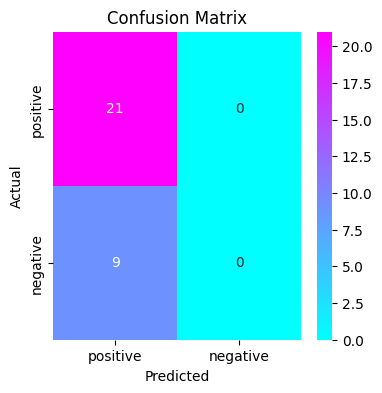

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have computed the confusion matrix and stored it in 'confusion'
# If not, refer to the previous response for the code

# Define class labels
class_labels = ['positive', 'negative']

# Create a heatmap
plt.figure(figsize=(4, 4))
confusion = confusion_matrix(actual_review, pred_review)

sns.heatmap(confusion, annot=True, fmt='d', cmap='cool',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [87]:
result = []
for i in range(len(y_test)):
    if actual_review[i] == pred_review[i]:
        result.append('correct prediction')
    else:
        result.append('wrong prediction')


test_table =  pd.DataFrame({'actual_sentiments': actual_review, 'prediction_review': pred_review, 'result': result})

In [88]:
test_table

,actual_sentiments,prediction_review,result
0,negative,negative,correct prediction
1,negative,negative,correct prediction
2,positive,negative,wrong prediction
3,negative,negative,correct prediction
4,negative,negative,correct prediction
5,negative,negative,correct prediction
6,negative,negative,correct prediction
7,negative,negative,correct prediction
8,negative,negative,correct prediction
9,negative,negative,correct prediction


---
---